# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

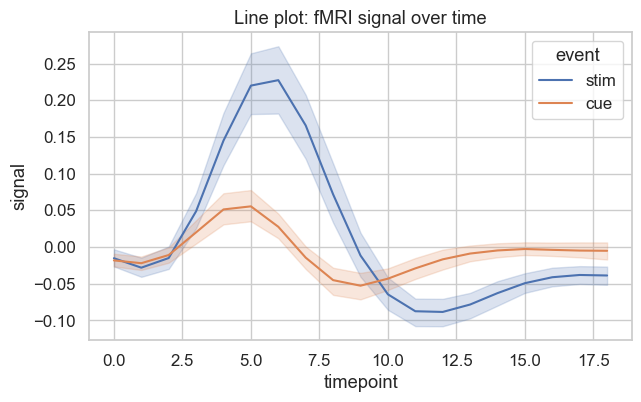

In [13]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



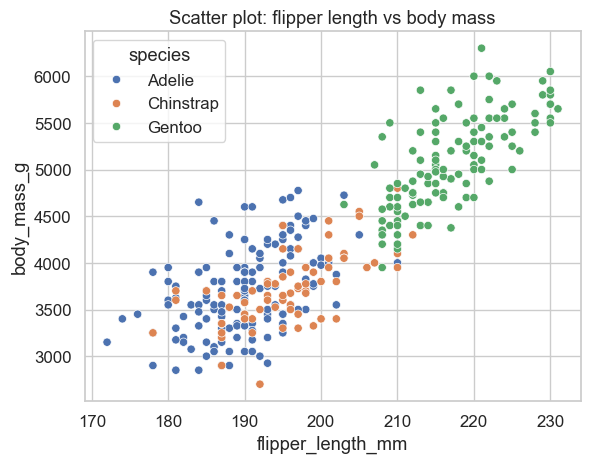

In [14]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



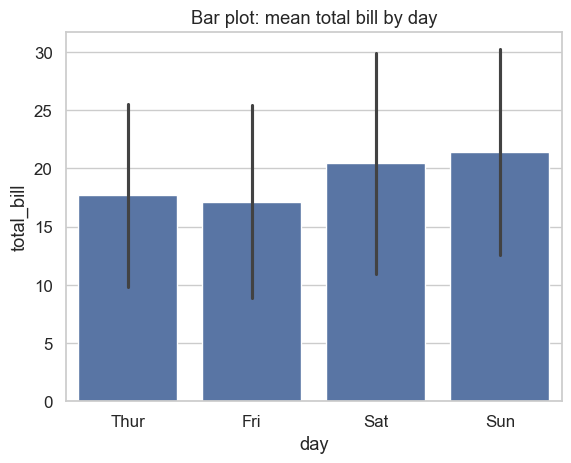

In [15]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

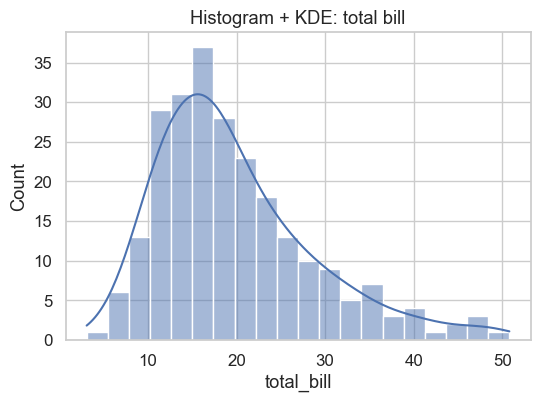

In [16]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

A KDE is a kernel density function and it is useful as a density function to find probabilities as it is smooth, rather than the discontinuous histogram.

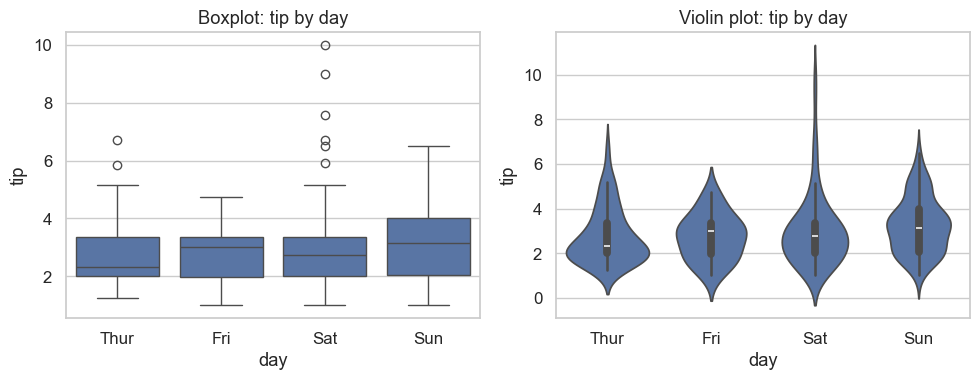

In [17]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

Boxplots are easier to see a basic summary of the data: the median, quartiles, and outliers and such, but loses the individual pieces of data. While violin plots do not keep it exacly original either, it is easier to see the distributions of the variables. 

### 3. Multi-dimensional encodings – color, size & facets

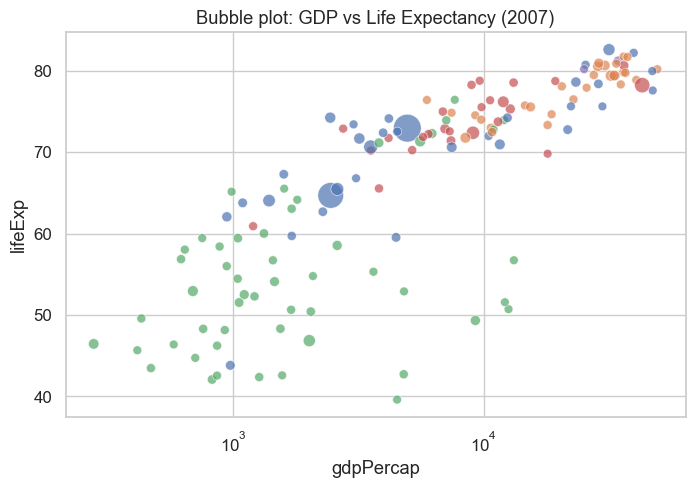

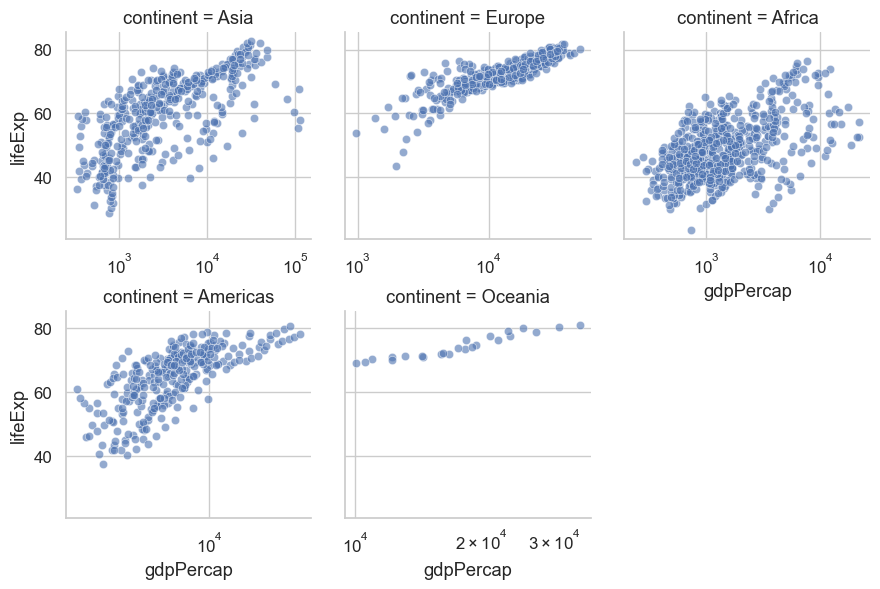

In [18]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

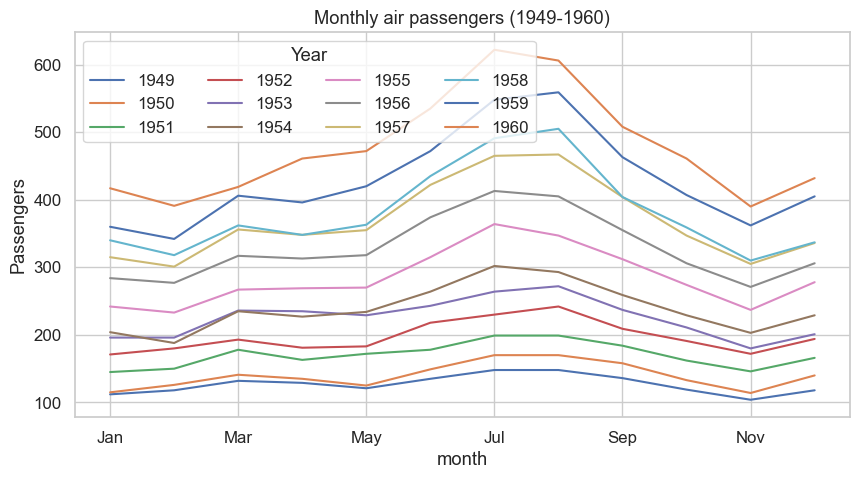

In [19]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

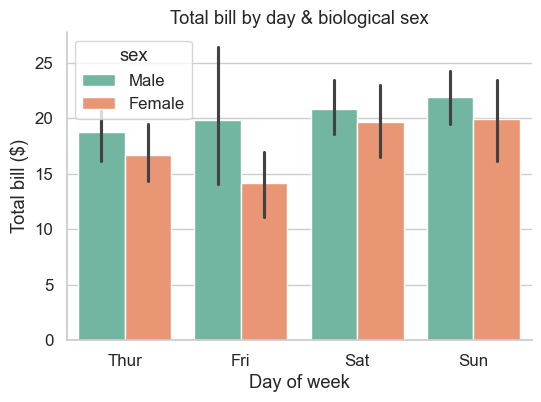

In [20]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [63]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (3, 49)


,Ea_4,Ea_6,So_9,We_7,No_6,We_5,No_12,We_6,We_1,So_5,...,No_1,No_9,Ea_5,We_2,So_10,No_8,So_8,No_10,Ea_7,We_8
0,3183,3431,3289,3998,2708,3673,3170,3864,3389,2954,...,2106,2895,3181,3354,3331,2810,3212,2947,3469,3919
1,3241,3406,3356,3870,2579,3699,3089,3802,3308,2974,...,2113,2839,3268,3429,3335,2752,3225,3057,3515,4043
2,3152,3428,3213,3883,2630,3677,3211,3705,3454,2974,...,2090,2924,3280,3362,3322,2823,3284,3061,3522,4053


#### Your analysis below

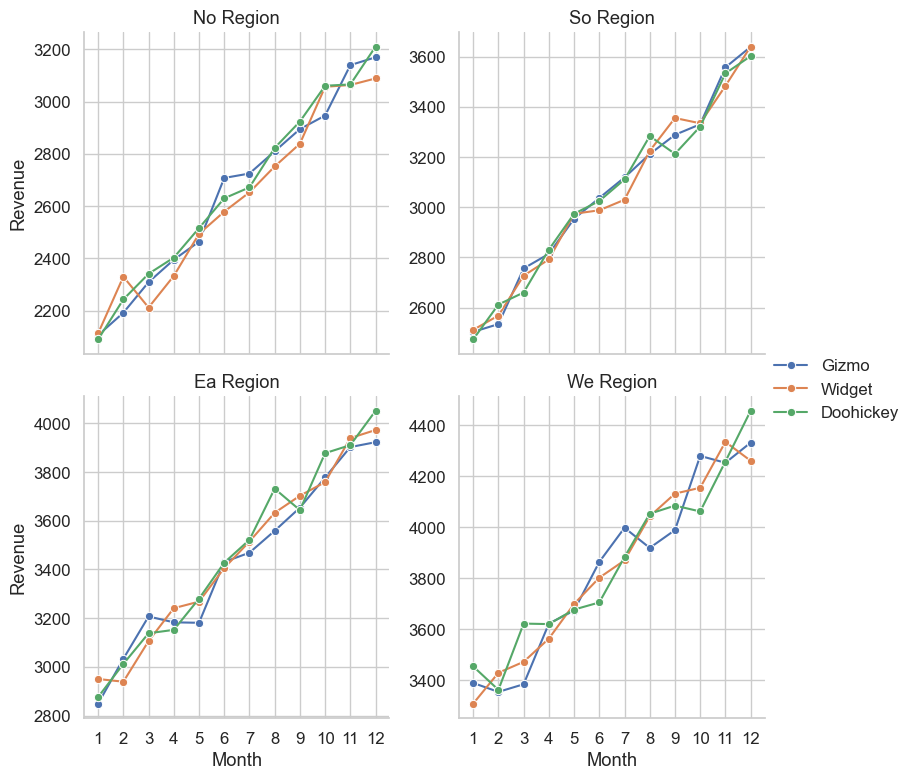

In [ ]:
# TODO: tidy the data, visualize, and answer questions
df = pd.melt(df, id_vars=['Product'], value_vars=['No_1', 'No_2', 'No_3', 'No_4', 'No_5', 'No_6','No_7', 'No_8', 'No_9','No_10', 'No_11', 'No_12','So_1', 'So_2', 'So_3', 'So_4', 'So_5', 'So_6','So_7', 'So_8', 'So_9','So_10', 'So_11', 'So_12', 'Ea_1', 'Ea_2', 'Ea_3', 'Ea_4', 'Ea_5', 'Ea_6','Ea_7', 'Ea_8', 'Ea_9','Ea_10', 'Ea_11', 'Ea_12', 'We_1', 'We_2', 'We_3', 'We_4', 'We_5', 'We_6','We_7', 'We_8', 'We_9','We_10', 'We_11', 'We_12'], var_name='Region and Month', value_name='revenue')
df['Region and Month'] = df['Region and Month'].str.split('_')
df['Region'] = df['Region and Month'].apply(lambda x: x[0] if len(x) > 0 else None)
df['Month'] = df['Region and Month'].apply(lambda x: x[1] if len(x) > 0 else None)
df.head()


g = sns.FacetGrid(df, col='Region', col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Month', y='revenue', hue='Product', marker='o')
g.add_legend()
g.set_titles(col_template="{col_name} Region")
g.set_axis_labels("Month", "Revenue")
plt.show()


#Question Answers:
#December in the East region generated the most revenue for Gizmo
#Widget and Doohicky do not nessesarily follow similar patterns, as the lines on the graph seem to move randomly


### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [74]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (48, 6)


/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_56077/3125190993.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2025-01-01', periods=48, freq='H')


,timestamp,S1,S2,S3,S4,S5
0,2025-01-01 00:00:00,18.5|62,24.7|59,20.2|62,22.1|43,16.7|46
1,2025-01-01 01:00:00,15.0|34,17.2|66,20.1|32,14.7|36,18.8|61
2,2025-01-01 02:00:00,17.8|55,21.4|62,19.3|57,20.5|59,20.1|48
3,2025-01-01 03:00:00,23.4|69,20.8|43,24.2|64,17.3|48,19.7|65
4,2025-01-01 04:00:00,19.1|54,19.9|70,21.3|67,23.5|63,27.8|59


#### Your analysis below

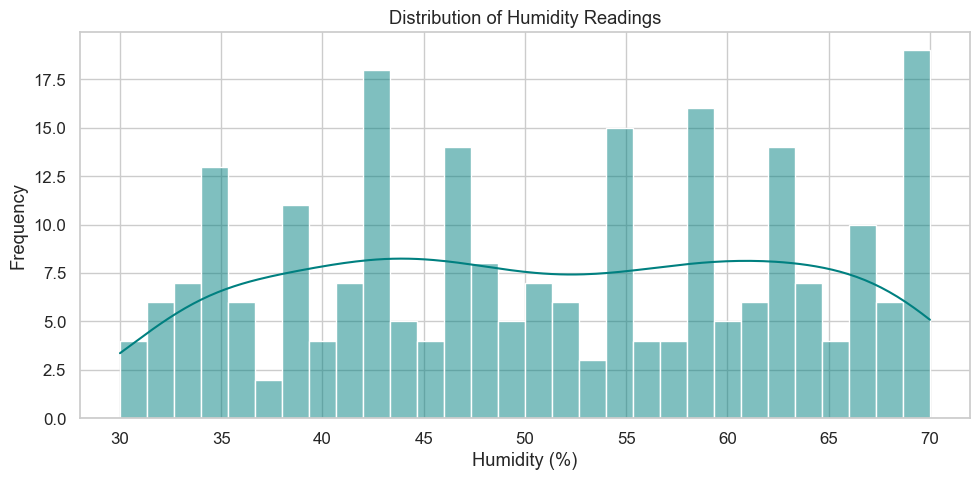

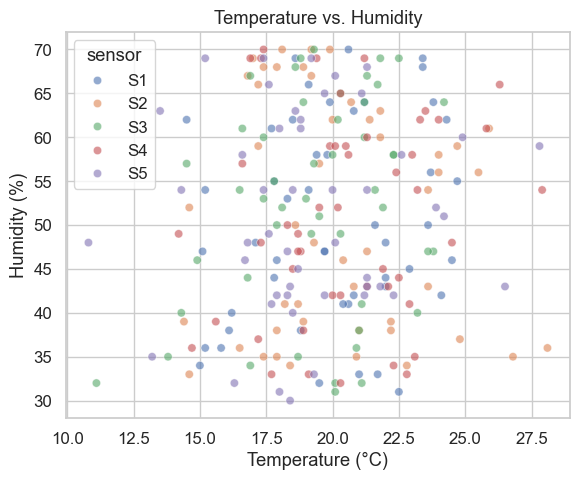

Correlation: 0.09


In [ ]:
# TODO: tidy the data, visualize, and answer questions
df = df.melt(id_vars='timestamp', var_name='sensor', value_name='reading')
df[['temperature', 'humidity']] = df['reading'].str.split('|', expand=True).astype(float)
df['hour'] = df['timestamp'].dt.hour
df.head()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='humidity', bins=30, kde=True, color='teal')
plt.title('Distribution of Humidity Readings')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='sensor', alpha=0.6)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

correlation = df[['temperature', 'humidity']].corr().loc['temperature', 'humidity']
print(f"Correlation: {correlation:.2f}")

#Question Answers
#Humidity was over 60% between 1-5am
#There is very low correlation between temperataure and humidity. showing that they are not very related.

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [10]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,respondent_id,age_group,tools_used,satisfaction_1-5
0,1,25-34,R,3
1,2,45+,"R, JavaScript, Python",4
2,3,35-44,"JavaScript, MATLAB, Python",1
3,4,25-34,"JavaScript, Python, MATLAB",4
4,5,25-34,"MATLAB, Python, JavaScript",5


#### Your analysis below

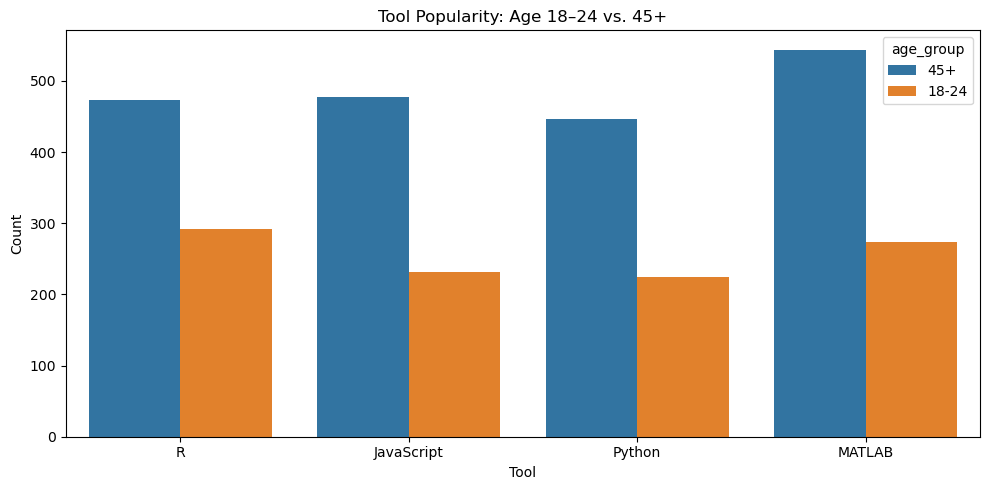

/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/3306293578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_satisfaction, x='primary_tool', y='satisfaction_1-5', palette='pastel')


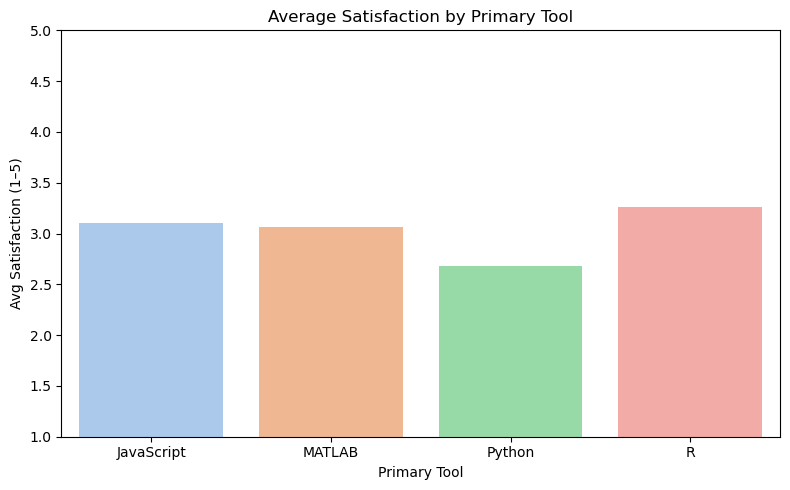

In [ ]:
# TODO: tidy the data, visualize, and answer questions

df = df.assign(tool=df['tools_used'].str.split(', ')).explode('tool')
df['tool'] = df['tool'].str.strip()
df.head()

df_filtered = df[df['age_group'].isin(['18-24', '45+'])]

plt.figure(figsize=(10, 5))
sns.countplot(data=df_filtered, x='tool', hue='age_group')
plt.title('Tool Popularity: Age 18–24 vs. 45+')
plt.xlabel('Tool')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df_primary = df.copy()
df_primary['primary_tool'] = df_primary['tools_used'].str.split(',').str[0].str.strip()
mean_satisfaction = df_primary.groupby('primary_tool')['satisfaction_1-5'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=mean_satisfaction, x='primary_tool', y='satisfaction_1-5', palette='pastel')
plt.title('Average Satisfaction by Primary Tool')
plt.xlabel('Primary Tool')
plt.ylabel('Avg Satisfaction (1–5)')
plt.ylim(1, 5)  # Since it's on a 1–5 scale
plt.tight_layout()
plt.show()

#Question Answers:
#MATLAB is most popular to people 45+, while R is most popular for people 18-24
#Reported satisfaction foes vary by tool a little, however all tools have a mean satifaction around 3 out of 5.


### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [22]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (50, 7)


,subject,bp_pre_placebo,bp_post_placebo,bp_pre_drugA,bp_post_drugA,bp_pre_drugB,bp_post_drugB
0,Subj_001,125.157437,120.165037,120.325596,108.669764,121.208901,116.628616
1,Subj_002,128.457029,120.225093,109.604270,99.824999,116.965746,109.393520
2,Subj_003,109.065799,101.919662,113.788266,102.866737,132.645352,126.791549
3,Subj_004,108.241822,101.827447,120.123079,109.687619,112.368396,110.321985
4,Subj_005,109.288827,101.391887,117.417428,106.135509,122.918342,116.440837


#### Your analysis below

condition
drugB       5.015235
placebo     5.585502
drugA      10.664127
Name: bp_reduction, dtype: float64


/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/495390351.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_long, x='condition', y='bp_reduction', estimator=np.mean, ci='sd', palette='Set2')
/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/495390351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long, x='condition', y='bp_reduction', estimator=np.mean, ci='sd', palette='Set2')


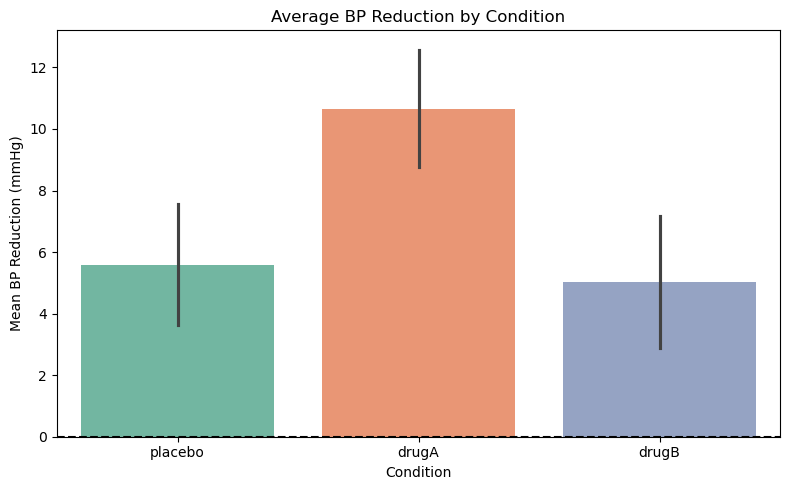

/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/495390351.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='condition', y='bp_reduction', palette='pastel')


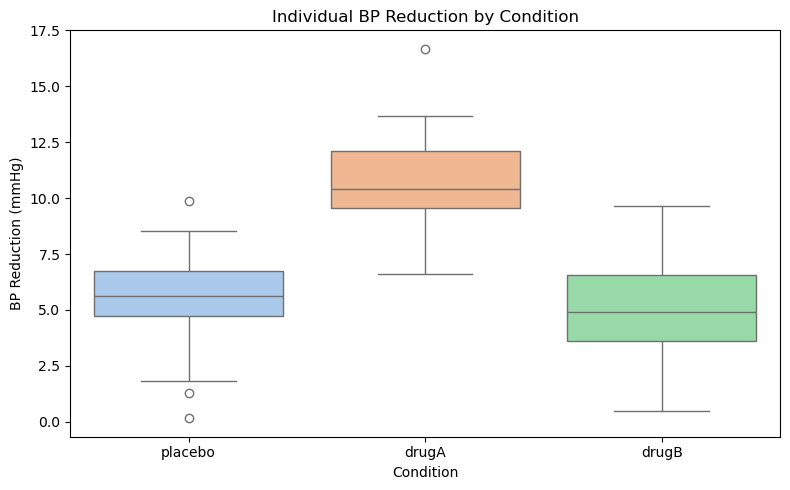

In [ ]:
# TODO: tidy the data, visualize, and answer questions
df_long = pd.wide_to_long(df, stubnames=['bp_pre', 'bp_post'], i='subject', j='condition', sep='_', suffix='.+').reset_index()
df_long['bp_reduction'] = df_long['bp_pre'] - df_long['bp_post']
df_long.head()

mean_reduction = df_long.groupby('condition')['bp_reduction'].mean().sort_values()
print(mean_reduction)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long, x='condition', y='bp_reduction', estimator=np.mean, ci='sd', palette='Set2')
plt.title('Average BP Reduction by Condition')
plt.ylabel('Mean BP Reduction (mmHg)')
plt.xlabel('Condition')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x='condition', y='bp_reduction', palette='pastel')
plt.title('Individual BP Reduction by Condition')
plt.ylabel('BP Reduction (mmHg)')
plt.xlabel('Condition')
plt.tight_layout()
plt.show()

#The average reduction in blood pressure for each is: drugA-10.664127; drugB-5.015235; placebo-5.585502
#There is slight variability in bp reduction by condition, as the box plots show a range of 6 for each treatment.



### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [24]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (752, 4)


,date,platform,views,likes
0,2024-07-01,TikTok,36.0k,3035.0
1,2024-07-01,Instagram,7.1k,1361.0
2,2024-07-01,YouTube,81.6k,NaN
3,2024-07-02,TikTok,60.5k,3765.0
4,2024-07-02,Instagram,86.3k,16732.0


#### Your analysis below

             views  like_rate
platform                     
TikTok     53350.0   0.129919
Instagram  52900.0   0.123494
YouTube    47900.0   0.131706


/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/2804681817.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='platform', y='views', estimator=np.median, ci=None, palette='Set2')
/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/2804681817.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='platform', y='views', estimator=np.median, ci=None, palette='Set2')


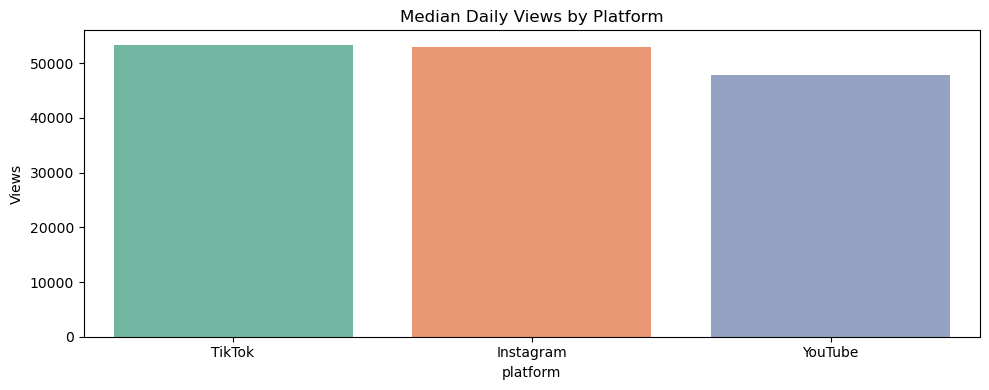

/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/2804681817.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='platform', y='like_rate', estimator=np.median, ci=None, palette='Set3')
/var/folders/d6/tmjrg0l50ld89cnqh49k16xr0000gn/T/ipykernel_85431/2804681817.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='platform', y='like_rate', estimator=np.median, ci=None, palette='Set3')


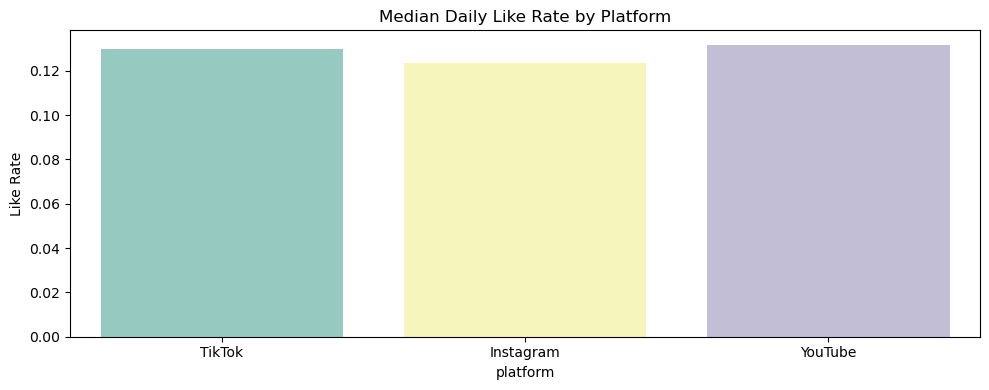

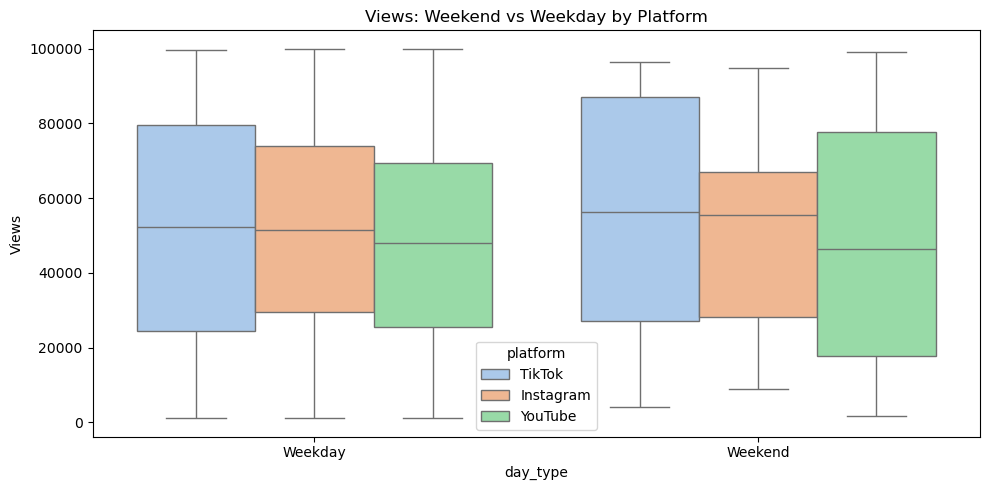

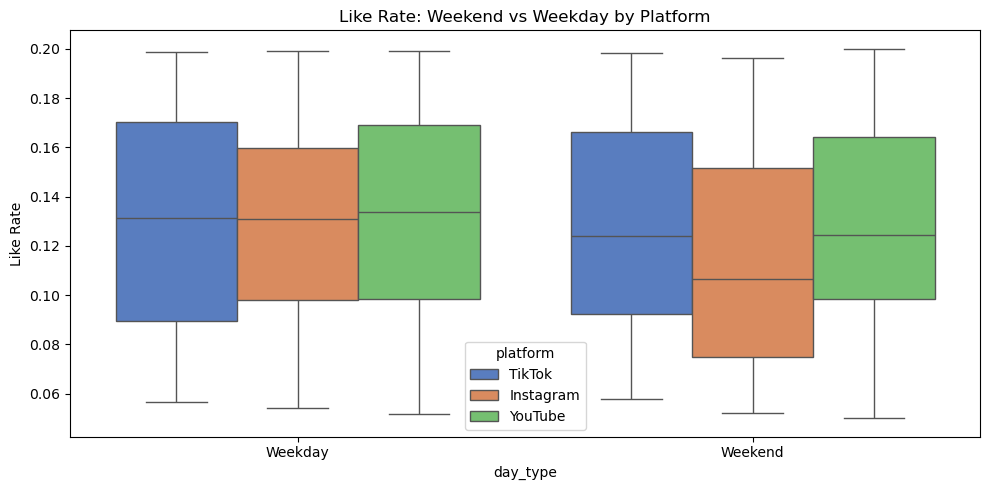

In [ ]:
# TODO: tidy the data, visualize, and answer questions

df = df.drop_duplicates()
df['views'] = df['views'].str.replace('k', '', regex=False).astype(float) * 1000
df_clean = df.dropna(subset=['likes']).copy()
df_clean['like_rate'] = df_clean['likes'] / df_clean['views']
df_clean['day_type'] = df_clean['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df_clean.head()

median_metrics = df_clean.groupby('platform')[['views', 'like_rate']].median().sort_values(by='views', ascending=False)
print(median_metrics)

# Plot median views
plt.figure(figsize=(10, 4))
sns.barplot(data=df_clean, x='platform', y='views', estimator=np.median, ci=None, palette='Set2')
plt.title('Median Daily Views by Platform')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

# Plot median like rate
plt.figure(figsize=(10, 4))
sns.barplot(data=df_clean, x='platform', y='like_rate', estimator=np.median, ci=None, palette='Set3')
plt.title('Median Daily Like Rate by Platform')
plt.ylabel('Like Rate')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='day_type', y='views', hue='platform', palette='pastel')
plt.title('Views: Weekend vs Weekday by Platform')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='day_type', y='like_rate', hue='platform', palette='muted')
plt.title('Like Rate: Weekend vs Weekday by Platform')
plt.ylabel('Like Rate')
plt.tight_layout()
plt.show()

#Youtube had the highest median daily views, and TikTok had the highest median like rate.
#Views were generally higher on weekends compared to weekdays, but did not obtain significantly higher like rates. 